<a href="https://colab.research.google.com/github/Hoangthang017/CS331-338-431_nine-dash-line-detection/blob/main/FeatureExtractionUsingAlexnet/SVM_vgg19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# kết nối với gg.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# thêm thư viện.
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report, f1_score, accuracy_score, recall_score, precision_score, make_scorer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sn
from sklearn.model_selection import cross_validate
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from imutils import paths
import os

SyntaxError: ignored

In [ ]:
# đọc dữ liệu từ các file .txt thông qua thư viện numpy.
feature_FC1 = np.loadtxt('/content/drive/MyDrive/Data Nine-Dash-Lines/DataFrame/FC1_features_vgg19.txt')
feature_FC2 = np.loadtxt('/content/drive/MyDrive/Data Nine-Dash-Lines/DataFrame/FC2_features_vgg19.txt')


labels_FC1 = np.loadtxt('/content/drive/MyDrive/Data Nine-Dash-Lines/DataFrame/FC1_labels_vgg19.txt')
labels_FC2 = np.loadtxt('/content/drive/MyDrive/Data Nine-Dash-Lines/DataFrame/FC2_labels_vgg19.txt')

In [ ]:
test1 = np.loadtxt("/content/drive/MyDrive/Data Nine-Dash-Lines/DataFrame/test/test_FC1_features_vgg19.txt")
test1_label = np.loadtxt('/content/drive/MyDrive/Data Nine-Dash-Lines/DataFrame/test/test_FC1_labels_vgg19.txt')

In [ ]:
test2 = np.loadtxt("/content/drive/MyDrive/Data Nine-Dash-Lines/DataFrame/test/test_FC2_features_vgg19.txt")
test2_label = np.loadtxt('/content/drive/MyDrive/Data Nine-Dash-Lines/DataFrame/test/test_FC2_labels_vgg19.txt')

---------------------------------
[0. 0. 0. 0.]
[0. 0. 1. 1.]
---------------------------------
[0. 1. 0. 0.]
[0. 0. 1. 1.]
---------------------------------
[0. 0. 1. 0.]
[0. 0. 1. 1.]
---------------------------------
[0. 1. 1. 0.]
[0. 0. 1. 1.]
---------------------------------
[0. 0. 0. 0.]
[0. 0. 1. 1.]
---------------------------------
[0. 0. 0. 0.]
[0. 0. 1. 1.]
---------------------------------
[0. 0. 0. 0.]
[0. 0. 1. 1.]
---------------------------------
[0. 0. 1. 0.]
[0. 0. 1. 1.]
---------------------------------
[0. 0. 0. 0.]
[0. 0. 1. 1.]
---------------------------------
[0. 0. 0. 0.]
[0. 0. 1. 1.]
Precision:  0.73
Recall:  0.80
Accuracy:  0.74
f1_score:  0.75


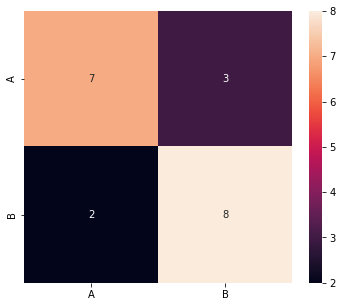

In [ ]:

X = feature_FC2
y = labels_FC2
clf_FC1 = SVC(kernel='linear', random_state=1)
kfold = KFold(n_splits=10, random_state=42,shuffle=True)
res_conf = []
##########################
sum_confusion = [[0, 0],
                 [0, 0]]
fold_idx = 1
for train_ids, val_ids in kfold.split(X, y):
 
  # Train model
  clf_FC1.fit(X[train_ids], y[train_ids])
  print("---------------------------------")
  print(clf_FC1.predict(test2))
  print(test1_label)

  conf_maxtrix = confusion_matrix(y[val_ids],clf_FC1.predict(X[val_ids]))
  res_conf.append(conf_maxtrix)

  fold_idx = fold_idx + 1

######################
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

results = cross_validate(estimator=clf_FC1,
                                          X=X,
                                          y=y,
                                          cv=kfold,
                                          scoring=scoring)

####################
precision = np.average(results['test_precision'])
recall = np.average(results['test_recall'])
acc = np.average(results['test_accuracy'])
f1 = np.average(results['test_f1_score'])
print("Precision: ", format(precision, '.2f'))
print("Recall: ", format(recall, '.2f'))
print("Accuracy: ", format(acc, '.2f'))
print("f1_score: ", format(f1, '.2f'))

# print(sum_confusion)
# print(sum_confusion/(fold_idx - 1) )
# t = sum_confusion/(fold_idx - 1)
# df_cm = pd.DataFrame(t.round(), index = [i for i in "AB"],
#                   columns = [i for i in "AB"])
# plt.figure(figsize = (6, 5))
# sn.heatmap(df_cm, annot=True)

mean_res_conf = np.mean(res_conf,axis=0)
df_cm = pd.DataFrame(mean_res_conf.round(), index = [i for i in "AB"],
                  columns = [i for i in "AB"])
plt.figure(figsize = (6, 5))
sn.heatmap(df_cm, annot=True)

---------------------------------
[0. 0. 0. 0.]
[0. 0. 1. 1.]
---------------------------------
[0. 1. 0. 0.]
[0. 0. 1. 1.]
---------------------------------
[0. 0. 1. 0.]
[0. 0. 1. 1.]
---------------------------------
[0. 1. 1. 0.]
[0. 0. 1. 1.]
---------------------------------
[0. 0. 0. 0.]
[0. 0. 1. 1.]
---------------------------------
[0. 0. 0. 0.]
[0. 0. 1. 1.]
---------------------------------
[0. 0. 0. 0.]
[0. 0. 1. 1.]
---------------------------------
[0. 0. 1. 0.]
[0. 0. 1. 1.]
---------------------------------
[0. 0. 0. 0.]
[0. 0. 1. 1.]
---------------------------------
[0. 0. 0. 0.]
[0. 0. 1. 1.]
Precision:  0.73
Recall:  0.80
Accuracy:  0.74
f1_score:  0.75
[[6.8 3.2]
 [2.  8. ]]


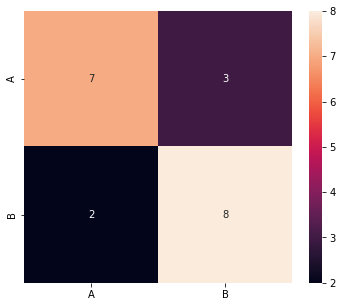

In [ ]:
model_svm =None
X = feature_FC2
y = labels_FC2
clf_FC2 = SVC(kernel='linear', random_state=1)
kfold = KFold(n_splits=10, random_state=42,shuffle=True)
res_conf = []
##########################
sum_confusion = [[0, 0],
                 [0, 0]]
fold_idx = 1
for train_ids, val_ids in kfold.split(X, y):
 
  # Train model
  clf_FC2.fit(X[train_ids], y[train_ids])

  print("---------------------------------")
  print(clf_FC2.predict(test2))
  print(test2_label)

  conf_maxtrix = confusion_matrix(y[val_ids],clf_FC2.predict(X[val_ids]))
  res_conf.append(conf_maxtrix)
  if (fold_idx==9):
    model_svm = clf_FC2
  fold_idx = fold_idx + 1

######################
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

results = cross_validate(estimator=clf_FC2,
                                          X=X,
                                          y=y,
                                          cv=kfold,
                                          scoring=scoring)

####################
precision = np.average(results['test_precision'])
recall = np.average(results['test_recall'])
acc = np.average(results['test_accuracy'])
f1 = np.average(results['test_f1_score'])
print("Precision: ", format(precision, '.2f'))
print("Recall: ", format(recall, '.2f'))
print("Accuracy: ", format(acc, '.2f'))
print("f1_score: ", format(f1, '.2f'))

print(mean_res_conf)
mean_res_conf = np.mean(res_conf,axis=0)
df_cm = pd.DataFrame(mean_res_conf.round(), index = [i for i in "AB"],
                  columns = [i for i in "AB"])
plt.figure(figsize = (6, 5))
sn.heatmap(df_cm, annot=True)

In [ ]:
# tạo một bộ phân loại.
clf_FC1 = make_pipeline(StandardScaler(), SVC(gamma='auto'))

# Tiến hành học từ tập dữ liệu train.
clf_FC1.fit(feature_FC1, labels)

# Tiến hành dự đoán dựa trên tập test
predicted_FC1 = clf_FC1.predict(feature_FC1_test)
accuracy = accuracy_score(predicted_FC1, labels_FC1_test)
precision = precision_score(predicted_FC1, labels_FC1_test)
re = recall_score(predicted_FC1, labels_FC1_test)
f1 = f1_score(predicted_FC1, labels_FC1_test)

# Hiển thị các chỉ số đánh giá chính.
print(classification_report(predicted_FC1, labels_FC1_test))

# Hiển thị ma trận Confusion matrix
conf_FC1 = metrics.plot_confusion_matrix(clf_FC1, feature_FC1_test, labels_FC1_test)
conf_FC1.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{conf_FC1.confusion_matrix}")
plt.show()

Lớp FC2

In [ ]:
# tạo một bộ phân loại.
clf_FC2 = make_pipeline(StandardScaler(), SVC(gamma='auto'))

# Tiến hành học từ tập dữ liệu train.
clf_FC2.fit(feature_FC2_train, labels_FC2_train)

# Tiến hành dự đoán dựa trên tập test
predicted_FC2 = clf_FC2.predict(feature_FC2_test)

# Hiển thị các chỉ số đánh giá chính.
print(classification_report(predicted_FC2, labels_FC2_test))

# Hiển thị ma trận Confusion matrix
conf_FC2 = metrics.plot_confusion_matrix(clf_FC2, feature_FC2_test, labels_FC2_test)
conf_FC2.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{conf_FC2.confusion_matrix}")
plt.show()  

Lớp FC1

In [ ]:
# define Alexnet Architecture
class Alexnet:
  def __init__(self, cs = 1000,  bp = "FC3"):
    self.classifer = cs
    self.breakPoint = bp
    self.model = None

  # setting model
  def define_model(self):
    model = Sequential()
    model.add(Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
    model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
    model.add(Flatten())
    model.add(Dense(4096,activation='relu'))

    # feature extraction in FC1
    if (self.breakPoint == "FC1"):
      self.model = model
      return

    model.add(Dropout(0.5))
    model.add(Dense(4096,activation='relu'))

    # feature extraction in FC2
    if (self.breakPoint == "FC2"):
      self.model = model
      return
    
    model.add(Dropout(0.5))
    model.add(Dense(self.classifer,activation='softmax'))
    self.model = model

  # predict 
  def predict(self, data):
    return self.model.predict(data)

  # get summary of model
  def summary(self):
    print(self.model.summary())

  # get model
  def get_model(self):
    return self.model

  # get/set break point
  def get_breakPoint(self):
    return self.breakPoint
  def set_breakPoint(self, bp):
    self.breakPoint = bp

  # get/set class
  def get_class(self):
    return self.classifer
  def set_class(self, c):
    self.classifer = c

In [ ]:
# get feature from model
def getFeature(imagePath, model):
  # preprocess image
  image = load_img(imagePath,target_size=(227,227))
  img_array = img_to_array(image)
  img_array = np.expand_dims(img_array, axis=0)

  # get feature 
  feature = model.predict(img_array)
  feature = feature.reshape(-1)

  return feature

In [ ]:
model = Alexnet(bp = 'FC2')
model.define_model()
model.summary()
image_path = '/content/1922.jpg'
fe = getFeature(image_path, model)
# print(fe.reshape(-1,1))

In [ ]:
print(model_svm.predict([fe]))